In [52]:
from mintpy.utils import *
import mintpy.utils as mpu
import mintpy.utils.readfile
import mintpy.utils.utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [53]:
sns.set_theme()
sns.set_style("ticks")
sns.set_context("paper")
# sns.set_theme(style="white") #, font_scale=0.5)
plt.style.use(['seaborn-paper', 'seaborn-ticks'])
sns.set_color_codes()

In [54]:
matplotlib.rcParams['lines.linewidth']
matplotlib.rcParams['axes.linewidth']
plt.style.available
matplotlib.use("pgf")
matplotlib.rcParams.update({    
    'font.family': 'serif',
    'font.serif': [],       # use latex default serif font
    'font.sans-serif': [],  # use a specific sans-serif font
    'font.monospace': [],   # use a specific sans-serif font
    'text.usetex': True,
    'pgf.rcfonts': False,
    'pgf.texsystem': 'pdflatex',
    'lines.linewidth': 0.7,
    'axes.linewidth': 0.6,
    'axes.unicode_minus': False
})

golden_ratio = (5**.5 - 1) / 2

width  = 3.48761
height = width*golden_ratio
print(width,height)

3.48761 2.155461519504021


In [55]:
mask_data, mask_attr = mpu.readfile.read('/data1/data/sar_rio_dumps/mintpy/maskROI.h5')

In [56]:
mask_attr

{'ALOOKS': '4',
 'ANTENNA_SIDE': '-1',
 'AZIMUTH_PIXEL_SIZE': '62.47099233267028',
 'CENTER_LINE_UTC': '30112.0',
 'DATA_TYPE': 'bool',
 'DATE12': '20171111_20201225',
 'EARTH_RADIUS': '6375135.668508159',
 'END_DATE': '20201225',
 'FILE_LENGTH': '779',
 'FILE_PATH': '/data1/data/sar_rio_dumps/mintpy/maskROI.h5',
 'FILE_TYPE': 'mask',
 'HEADING': '-1.676202658053862e+02',
 'HEIGHT': '704335.8641332268',
 'INCIDENCE_ANGLE': '3.899876128234293e+01',
 'LAT_REF1': '-22.83573284310376',
 'LAT_REF2': '-22.62561722460496',
 'LAT_REF3': '-23.00032312250924',
 'LAT_REF4': '-22.78987460013468',
 'LENGTH': '35',
 'LONG_REF1': '-43.29766906596053',
 'LONG_REF2': '-44.18552664376475',
 'LONG_REF3': '-43.3416520794907',
 'LONG_REF4': '-44.23062879497427',
 'ORBIT_DIRECTION': 'DESCENDING',
 'PLATFORM': 'sen',
 'PRF': '1717.128973878037',
 'PROCESSOR': 'snap',
 'PROJECT_NAME': 'mintpy',
 'P_BASELINE_BOTTOM_HDR': '13.561497688293457',
 'P_BASELINE_TOP_HDR': '13.561497688293457',
 'RANGE_PIXEL_SIZE': '5

In [57]:
plt.imshow(mask_data)

In [58]:
mask_data_temp, mask_attr_temp = mpu.readfile.read('/data1/data/sar_rio_dumps/mintpy/CTR_Rio/maskTempCoh.h5')
plt.imshow(mask_data_temp)

In [59]:
plt.imshow(mask_data*mask_data_temp)
mask_data = mask_data*mask_data_temp

In [60]:
ts_file = '/data1/data/sar_rio_dumps/mintpy/CTR_Rio/timeseries_ERA5_ramp_demErr.h5'

In [61]:
ts_data, ts_attr = mpu.readfile.read(ts_file)

In [62]:
from mintpy.objects import (
    geometryDatasetNames,
    geometry,
    ifgramStack,
    timeseries,
)
from mintpy.utils import ptime, readfile

In [63]:
obj = timeseries(ts_file)

In [64]:
date_list = timeseries(ts_file).get_date_list()

In [65]:
the_dates, dis = mpu.utils.read_timeseries_yx(0,0, ts_file=ts_file)

input y / x: 0 / 0


In [66]:
ts_attr

{'ALOOKS': '4',
 'ANTENNA_SIDE': '-1',
 'AZIMUTH_PIXEL_SIZE': '62.47099233267028',
 'CENTER_LINE_UTC': '30112.0',
 'DATA_TYPE': 'float32',
 'DATE12': '171111-180110',
 'EARTH_RADIUS': '6375135.668508159',
 'END_DATE': '20201225',
 'FILE_LENGTH': '779',
 'FILE_PATH': '/data1/data/sar_rio_dumps/mintpy/CTR_Rio/timeseries_ERA5_ramp_demErr.h5',
 'FILE_TYPE': 'timeseries',
 'HEADING': '-1.676202658053862e+02',
 'HEIGHT': '704335.8641332268',
 'INCIDENCE_ANGLE': '3.899876128234293e+01',
 'LAT_REF1': '-22.83573284310376',
 'LAT_REF2': '-22.62561722460496',
 'LAT_REF3': '-23.00032312250924',
 'LAT_REF4': '-22.78987460013468',
 'LENGTH': '35',
 'LONG_REF1': '-43.29766906596053',
 'LONG_REF2': '-44.18552664376475',
 'LONG_REF3': '-43.3416520794907',
 'LONG_REF4': '-44.23062879497427',
 'ORBIT_DIRECTION': 'DESCENDING',
 'PLATFORM': 'sen',
 'PRF': '1717.128973878037',
 'PROCESSOR': 'snap',
 'PROJECT_NAME': 'mintpy',
 'P_BASELINE_BOTTOM_HDR': '13.561497688293457',
 'P_BASELINE_TOP_HDR': '13.56149768

In [67]:
plt.imshow(ts_data[1]*mask_data);

In [68]:
ts_cum_sum = (ts_data*mask_data).sum(axis=(1,2))/mask_data.sum()
ts_cum_sum.shape

(94,)

In [69]:
df_ts_data = pd.DataFrame(ts_cum_sum, columns=['Displacement'], index=pd.DatetimeIndex(the_dates))

In [70]:
df_ts_data = df_ts_data.resample('12D').mean().rename(columns=lambda x: 'Displacement')

In [71]:
a = open('/data1/data/sar_rio_dumps/mintpy/CTR_Rio/exclude_date.txt').readlines()
# a.append('20191207\n') #Missing data from S1
a

['20180919\n']

In [72]:
excludeDate = [x[:-1] for x in a]

In [73]:
df_ts_data['Count'] = 1

In [74]:
for i in excludeDate:
    df_ts_data.loc[i[:8]:i[:8]] = 0

In [75]:
df_ts_data['Days'] = 1

In [76]:
df_ts_data.Displacement *= 100
# df_ts_data.Displacement /= 12

In [77]:
df_ts_B = pd.DataFrame(ts_cum_sum, columns=['Displacement'], index=pd.DatetimeIndex(the_dates))
df_ts_B.loc[excludeDate, 'Displacement'] = np.nan
df_ts_B  = df_ts_B['2018-01-01':]
df_ts_B.Displacement *= 100
# df_ts_B.Displacement /= 12
df_ts_B

,Displacement
2018-01-10,0.026161
2018-01-22,0.148010
2018-02-03,0.218287
2018-02-15,0.297515
2018-02-27,0.228746
...,...
2020-11-07,0.913382
2020-11-19,0.926932
2020-12-01,0.812558
2020-12-13,0.909101


In [78]:
df_ts_A = df_ts_data.copy()
df_ts_A.loc[excludeDate, 'Displacement'] = np.nan
df_ts_A = df_ts_A.resample('D').last()
df_ts_A.Displacement = df_ts_A.Displacement.interpolate(method='linear').diff()
df_ts_A = df_ts_A.bfill(limit=11) \
                 .resample('A') \
                 .sum()
df_ts_A['Velocity'] = df_ts_A.Displacement/df_ts_A.Days*365.25
df_ts_A.Displacement = (df_ts_A.Displacement).cumsum()
# df_ts_A.Velocity = df_ts_A.Velocity/df_ts_A.Days*365.25
df_ts_A = df_ts_A['2018-01-01':]
df_ts_A

,Displacement,Count,Days,Velocity
2018-12-31,0.565693,353.0,365.0,0.458452
2019-12-31,0.739127,365.0,365.0,0.173553
2020-12-31,1.232544,360.0,360.0,0.500613


In [79]:
df_ts_Q = df_ts_data.copy()
df_ts_Q.loc[excludeDate, 'Displacement'] = np.nan
df_ts_Q = df_ts_Q.resample('D').last()
df_ts_Q.Displacement = df_ts_Q.Displacement.interpolate(method='linear').diff()
df_ts_Q = df_ts_Q.bfill(limit=11) \
                 .resample('Q') \
                 .sum()
df_ts_Q['Velocity']  = df_ts_Q.Displacement/df_ts_Q.Days*365.25
df_ts_Q.Displacement = df_ts_Q.Displacement.cumsum()
df_ts_Q = df_ts_Q
df_ts_Q

,Displacement,Count,Days,Velocity
2017-12-31,0.107555,39.0,39.0,1.007295
2018-03-31,0.279777,90.0,90.0,0.698936
2018-06-30,0.230983,91.0,91.0,-0.195848
2018-09-30,0.337600,80.0,92.0,0.423281
2018-12-31,0.565693,92.0,92.0,0.905555
2019-03-31,0.587561,90.0,90.0,0.088747
2019-06-30,0.458358,91.0,91.0,-0.518589
2019-09-30,0.651097,92.0,92.0,0.765197
2019-12-31,0.739127,92.0,92.0,0.349489
2020-03-31,0.496162,91.0,91.0,-0.975199


In [80]:
df_ts_M = df_ts_data.copy()
df_ts_M.loc[excludeDate, 'Displacement'] = np.nan
df_ts_M = df_ts_M.resample('D').last()
df_ts_M.Displacement = df_ts_M.Displacement.interpolate(method='linear').diff()
df_ts_M = df_ts_M.bfill(limit=11) \
                 .resample('M') \
                 .sum()
df_ts_M['Velocity']  = df_ts_M.Displacement/df_ts_M.Days*365.25
df_ts_M.Displacement = df_ts_M.Displacement.cumsum()
df_ts_M = df_ts_M['2018-01-01':]
df_ts_M

,Displacement,Count,Days,Velocity
2018-01-31,0.203575,31.0,31.0,1.131334
2018-02-28,0.233398,28.0,28.0,0.389023
2018-03-31,0.279777,31.0,31.0,0.546458
2018-04-30,0.289869,30.0,30.0,0.122861
2018-05-31,0.311444,31.0,31.0,0.254210
2018-06-30,0.230983,30.0,30.0,-0.979616
2018-07-31,0.411204,31.0,31.0,2.123411
2018-08-31,0.494925,31.0,31.0,0.986414
2018-09-30,0.337600,18.0,30.0,-1.915426
2018-10-31,0.497658,31.0,31.0,1.885849


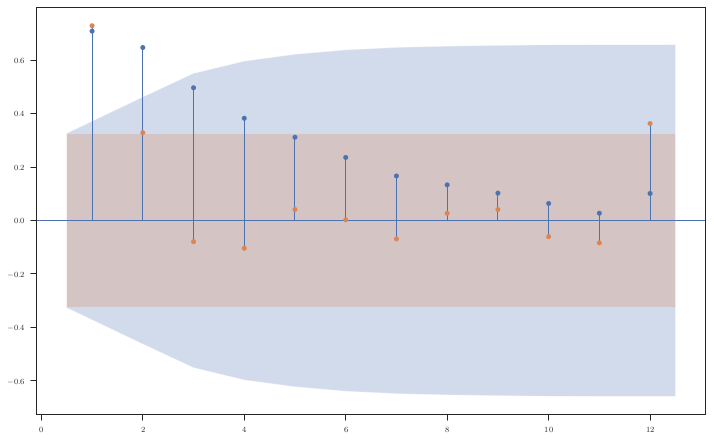

In [81]:
fig = plt.figure(figsize=(12,7.5))
ax = fig.subplots()
plot_acf(df_ts_M.Displacement, zero=False, ax=ax, lags=12)
plot_pacf(df_ts_M.Displacement, zero=False, ax=ax, lags=12)
ax.set_title(None)
fig

In [82]:
# fig = plt.figure(figsize=(width,height))
# ax = sns.lineplot(data=df_ts_Q.Acceleration.loc[:'2020-09-30'], marker='o', color='C1');
# plt.legend(["Quarterly Velocity"], loc='upper left')
# # ax.set_ylabel(r'Acceleration [cm/year\textsuperscript{2}]')
# ax.set_ylabel(None)
# sns.despine(trim=False);
# fig.autofmt_xdate()
# fig.tight_layout()
# fig.savefig("pgf/rio_acceleration.pgf", backend='pgf', dpi=600)
# fig

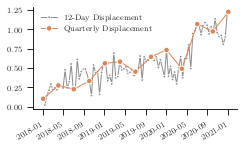

In [83]:
fig = plt.figure(figsize=(width,height))
ax1 = fig.subplots()
sns.lineplot(data=df_ts_B.Displacement, marker='.', color='C7', ax=ax1);
sns.lineplot(data=df_ts_Q.Displacement, marker='o', color='C1', ax=ax1)
# ax1.set_ylabel(r'Displacement [m]')
ax1.set_ylabel(None)
plt.legend(ax1.lines,["12-Day Displacement"]+["Quarterly Displacement"], loc='upper left')
sns.despine(right=True, trim=False)
fig.autofmt_xdate()
# ax1.set_xlabel(None)
# ax1.set_xticklabels([])
# ax1.text(1.0,0.05,'Rio de Janeiro',
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform=ax1.transAxes)
fig.tight_layout()
fig.savefig("pgf/rio_displacement_velocity.pgf", backend='pgf', dpi=600)
fig

In [84]:
stringency = pd.read_csv("/data1/data/stringency_index.csv", index_col=1, parse_dates=True, )
stringency = stringency.T
stringency = stringency[2:] 
stringency.index = pd.DatetimeIndex(stringency.index)

In [85]:
STR = stringency['BRA'].astype(float)
df_ts_Q['Stringency'] = STR.resample('Q') \
                           .mean()['2018-01-01':] 
df_ts_Q['Stringency'].fillna(0, inplace=True)

In [86]:
STR = stringency['BRA'].astype(float)
df_ts_M['Stringency'] = STR.resample('M') \
                           .mean()['2018-01-01':] 
df_ts_M['Stringency'].fillna(0, inplace=True)

In [87]:
country = "Brazil_Seasonal"
GDP = pd.read_csv("/data1/data/GDP.csv" )
GDP.index = pd.DatetimeIndex(GDP.Date)
GDP = GDP.resample('Q').max()
df_ts_Q.loc[:, "GDP"] = GDP[country]

GDP_M = (GDP[country]).resample('M').last()
GDP_M['2020-10-31'] = np.NaN
GDP_M['2020-11-30'] = np.NaN
GDP_M['2020-12-31'] = np.NaN

GDP_Q = GDP[country]

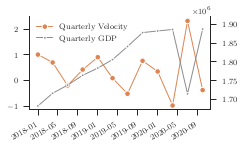

In [88]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_Q.Velocity.loc[:'2020-09-30'], marker='o', color='C1');
# ax1.set_ylabel(r'Acceleration [cm/year\textsuperscript{2}]')
ax1.set_ylabel(None)
ax2 = plt.twinx()
sns.lineplot(data=df_ts_Q.GDP, ax=ax2, marker='.', color='C7')
# ax2.set_ylabel(r'GDP [\textcurrency]')
ax2.set_ylabel(None)
ax2.set_ylim(top=1920000)
plt.legend(ax1.lines+ax2.lines, ["Quarterly Velocity"]+["Quarterly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/rio_acceleration.pgf", backend='pgf', dpi=600)
fig

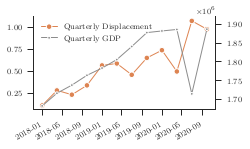

In [89]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_Q.Displacement.loc[:'2020-09-30'], marker='o', color='C1')
# ax1.set_ylabel(r'Velocity [cm/year]')
ax1.set_ylabel(None)
# ax1.set_ylim(bottom=0)
ax2 = plt.twinx()
sns.lineplot(data=df_ts_Q.GDP, ax=ax2, marker='.', color='C7')
# ax2.set_ylabel(r'GDP [\textcurrency]')
ax2.set_ylabel(None)
ax2.set_ylim(top=1920000)
plt.legend(ax1.lines+ax2.lines, ["Quarterly Displacement"]+["Quarterly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/rio_velocity_GDP.pgf", backend='pgf', dpi=600)
fig

In [90]:
df_ts_M['GDP_naive']      = (df_ts_Q.GDP).resample('M').last()
df_ts_M.GDP_naive         =  df_ts_M.GDP_naive.bfill()
df_ts_M['GDP'] = GDP_M.reset_index() \
                      .interpolate(method='spline', order=3) \
                      .set_index('Date') \
                      .shift(-1)[:'2020-09-30']
df_ts_M

,Displacement,Count,Days,Velocity,Stringency,GDP_naive,GDP
2018-01-31,0.203575,31.0,31.0,1.131334,0.000000,1717067.2,1.707581e+06
2018-02-28,0.233398,28.0,28.0,0.389023,0.000000,1717067.2,1.717067e+06
2018-03-31,0.279777,31.0,31.0,0.546458,0.000000,1717067.2,1.724685e+06
2018-04-30,0.289869,30.0,30.0,0.122861,0.000000,1738623.7,1.731445e+06
2018-05-31,0.311444,31.0,31.0,0.254210,0.000000,1738623.7,1.738624e+06
2018-06-30,0.230983,30.0,30.0,-0.979616,0.000000,1738623.7,1.747096e+06
2018-07-31,0.411204,31.0,31.0,2.123411,0.000000,1764599.4,1.756131e+06
2018-08-31,0.494925,31.0,31.0,0.986414,0.000000,1764599.4,1.764599e+06
2018-09-30,0.337600,18.0,30.0,-1.915426,0.000000,1764599.4,1.771687e+06
2018-10-31,0.497658,31.0,31.0,1.885849,0.000000,1783850.7,1.777847e+06


In [91]:
dates_prior = slice('2018-01-01','2019-12-31')
dates_full = slice('2018-01-01','2020-08-31')

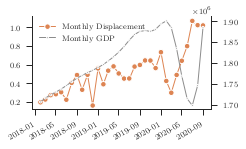

In [92]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_M.Displacement.loc[dates_full], marker='o', color='C1')
# ax1.set_ylabel(r'Velocity [cm/year]')
ax1.set_ylabel(None)
ax2 = plt.twinx()
# sns.lineplot(data=df_ts_M.GDP_naive.loc[dates_full], ax=ax2, marker='.', color='C1')
sns.lineplot(data=df_ts_M.GDP.loc[dates_full], ax=ax2, marker='.', markersize=4, color='C7')
# ax2.set_ylabel(r'GDP [\textcurrency]')
ax2.set_ylabel(None)
# ax2.set_ylim(top=1350000)
plt.legend(ax1.lines+ax2.lines, ["Monthly Displacement"]+["Monthly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/rio_velocity_GDP_monthly.pgf", backend='pgf', dpi=600)
fig

In [93]:
import statsmodels.api as sm
X_var = ['GDP']
X = df_ts_M.loc[dates_prior, X_var]
y = df_ts_M.Displacement[dates_prior]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Displacement   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     378.4
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.38e-15
Time:                        12:52:49   Log-Likelihood:                 25.111
No. Observations:                  24   AIC:                            -46.22
Df Residuals:                      22   BIC:                            -43.87
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6354      0.210    -17.317      0.000      -4.047      -3.224
GDP         2.267e-06   1.17e-07     19.452      0.000    2.04e-06     2.5e-06
==============================================================================
Omnibus:                        3.494   Durbin-Watson:                   2.675
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                1.833
Skew:                          -0.577   Prob(JB):                        0.400
Kurtosis:                       3.709   Cond. No.                     5.56e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 5.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
import statsmodels.api as sm
X_var = ['GDP']
X = df_ts_M.loc[dates_full, X_var]
y = df_ts_M.Displacement[dates_full]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Displacement   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                    0.3653
Date:                Fri, 04 Jun 2021   Prob (F-statistic):              0.550
Time:                        12:52:49   Log-Likelihood:                 2.2607
No. Observations:                  32   AIC:                           -0.5215
Df Residuals:                      30   BIC:                             2.410
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7103      2.104     -0.338      0.736      -4.833       3.413
GDP         6.817e-07   1.13e-06      0.604      0.546   -1.53e-06    2.89e-06
==============================================================================
Omnibus:                        9.763   Durbin-Watson:                   0.495
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.430
Skew:                           1.148   Prob(JB):                       0.0148
Kurtosis:                       4.023   Cond. No.                     5.12e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 5.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
import statsmodels.api as sm
X_var = ['GDP','Stringency']
X = df_ts_M.loc[dates_full, X_var].copy()
X.GDP /= 1000000
y = df_ts_M.Displacement[dates_full]
X = sm.add_constant(X)
# X['trend'] = range(0,len(X))
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Displacement   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     46.99
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           7.98e-10
Time:                        13:35:53   Log-Likelihood:                 19.046
No. Observations:                  32   AIC:                            -32.09
Df Residuals:                      29   BIC:                            -27.69
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0687      0.744     -2.780      0.005      -3.527      -0.610
GDP            1.3855      0.414      3.343      0.001       0.573       2.198
Stringency     0.0066      0.001      9.477      0.000       0.005       0.008
==============================================================================
Omnibus:                        0.843   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.802
Skew:                          -0.347   Prob(JB):                        0.670
Kurtosis:                       2.654   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
print("GDP", X.GDP.min(), X.GDP.max())
print("Displacement", X.GDP.min()*1.3855, X.GDP.max()*1.3855)
print("Stringency", X.Stringency.min(), X.Stringency.max())
print("Stringency", X.Stringency.min()*0.0066, X.Stringency.max()*0.0066)

GDP 1.6991410198329304 1.9023447016742403
Displacement 2.354159882978525 2.63569858416966
Stringency 0.0 80.54129032258064
Stringency 0.0 0.5315725161290322


In [96]:
import statsmodels.api as sm
X_var = ['GDP','Stringency']
dates = slice('2018-03-31','2020-09-30')
X = df_ts_Q.loc[dates, X_var]
y = df_ts_Q.Displacement[dates]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':4})
X_all = df_ts_Q.loc[dates, X_var]
X_all.Stringency = 0.0
X_all = sm.add_constant(X_all)
# X_all['trend'] = range(1,len(X)+1)
predictions = model.predict(X_all) # make the predictions by the model
# Print out the statistics
model.summary()

/home/tvanzyl/anaconda3/envs/mintpy/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Displacement   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     46.41
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           3.96e-05
Time:                        12:52:49   Log-Likelihood:                 6.8464
No. Observations:                  11   AIC:                            -7.693
Df Residuals:                       8   BIC:                            -6.499
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6427      1.207     -1.361      0.173      -4.008       0.723
GDP         1.169e-06   6.64e-07      1.760      0.078   -1.32e-07    2.47e-06
Stringency     0.0072      0.001      9.557      0.000       0.006       0.009
==============================================================================
Omnibus:                        4.735   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                1.208
Skew:                           0.033   Prob(JB):                        0.546
Kurtosis:                       1.378   Cond. No.                     4.97e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
[2] The condition number is large, 4.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
df_ts_Q["Prediction"] = predictions
df_ts_Q["Residual_Displacement"] = (df_ts_Q.Displacement-df_ts_Q.Prediction)

In [98]:
df_ts_Q.loc['20180101':'20191231',['Velocity','Displacement','GDP','Residual_Displacement']].corr()

,Velocity,Displacement,GDP,Residual_Displacement
Velocity,1.000000,0.258200,-0.053840,0.408689
Displacement,0.258200,1.000000,0.877442,0.961615
GDP,-0.053840,0.877442,1.000000,0.712135
Residual_Displacement,0.408689,0.961615,0.712135,1.000000


In [99]:
df_ts_Q.loc['20180101':'20200930',['Velocity','Displacement','GDP','Residual_Displacement','Stringency']].corr()

,Velocity,Displacement,GDP,Residual_Displacement,Stringency
Velocity,1.000000,0.412840,-0.573633,0.611390,0.306641
Displacement,0.412840,1.000000,0.291302,0.953960,0.809135
GDP,-0.573633,0.291302,1.000000,-0.009037,-0.010642
Residual_Displacement,0.611390,0.953960,-0.009037,1.000000,0.849120
Stringency,0.306641,0.809135,-0.010642,0.849120,1.000000


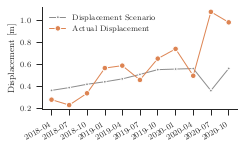

In [100]:
fig = plt.figure(figsize=(width,height))
ax = sns.lineplot(data=df_ts_Q.Prediction, marker='.', color='C7')
sns.lineplot(data=df_ts_Q.Displacement.loc[dates], marker='o', color='C1', ax=ax)
ax.set_ylabel(r'Displacement [m]')
plt.legend(["Displacement Scenario","Actual Displacement"], loc='upper left')
sns.despine(trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/rio_scenario_velocity.pgf", backend='pgf', dpi=600)
fig

In [101]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
model = AutoReg(df_ts_M.loc[:'20200731','Displacement'], lags=1, trend='t', exog=df_ts_M.loc[:'20200731',['Stringency','GDP']])
# model = ARIMA(df_ts_M.loc[:'20200630','Velocity'], order=(1,0,0), exog=df_ts_M.loc[:'20200630',['Stringency','GDP']])
res = model.fit()
print(res.summary())
pred_res = res.get_prediction(start='20180131', end='20200930', exog_oos=df_ts_M.loc['20200830':'20200930',['Stringency','GDP']])
# pred_res = res.get_prediction(start='20180131', end='20200930', exog=df_ts_M.loc['20200731':'20200930',['Stringency','GDP']])
P = pred_res.conf_int()[dates]
P['mean'] = pred_res.predicted_mean[dates]
PP = P.unstack().rename('Displacement').to_frame().reset_index()

                            AutoReg Model Results                             
Dep. Variable:           Displacement   No. Observations:                   31
Model:                   AutoReg-X(1)   Log Likelihood                  20.934
Method:               Conditional MLE   S.D. of innovations              0.120
Date:                Fri, 04 Jun 2021   AIC                             -3.900
Time:                        12:52:50   BIC                             -3.667
Sample:                    02-28-2018   HQIC                            -3.825
                         - 07-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
trend               0.0060      0.004      1.357      0.175      -0.003       0.015
Displacement.L1     0.3681      0.167      2.202      0.028       0.040       0.696
Stringency          0.0028      

/home/tvanzyl/anaconda3/envs/mintpy/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


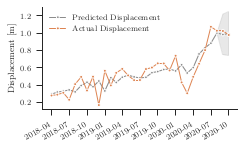

In [102]:
fig = plt.figure(figsize=(width,height))
ax = sns.lineplot(data=PP, x='level_1', y='Displacement',  marker='.', color='C7')
ax.set_xlabel(None)
sns.lineplot(data=df_ts_M.Displacement.loc[dates], marker='o', markersize=3, color='C1', ax=ax)
ax.set_ylabel(r'Displacement [m]')
plt.legend(["Predicted Displacement","Actual Displacement"], loc='upper left')
sns.despine(trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/rio_predicted_velocity.pgf", backend='pgf', dpi=600)
fig